[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Aug 13 13:54:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [44]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\ekrem\Desktop\intership_project(Mekansal Birey Kalma Süresi Analizi)


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [45]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.11.4 torch-2.4.0+cpu CPU (AMD Ryzen 7 6800H with Radeon Graphics)
Setup complete  (16 CPUs, 31.2 GB RAM, 506.9/930.7 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [46]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 14.0ms
Speed: 0.5ms pre-process, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


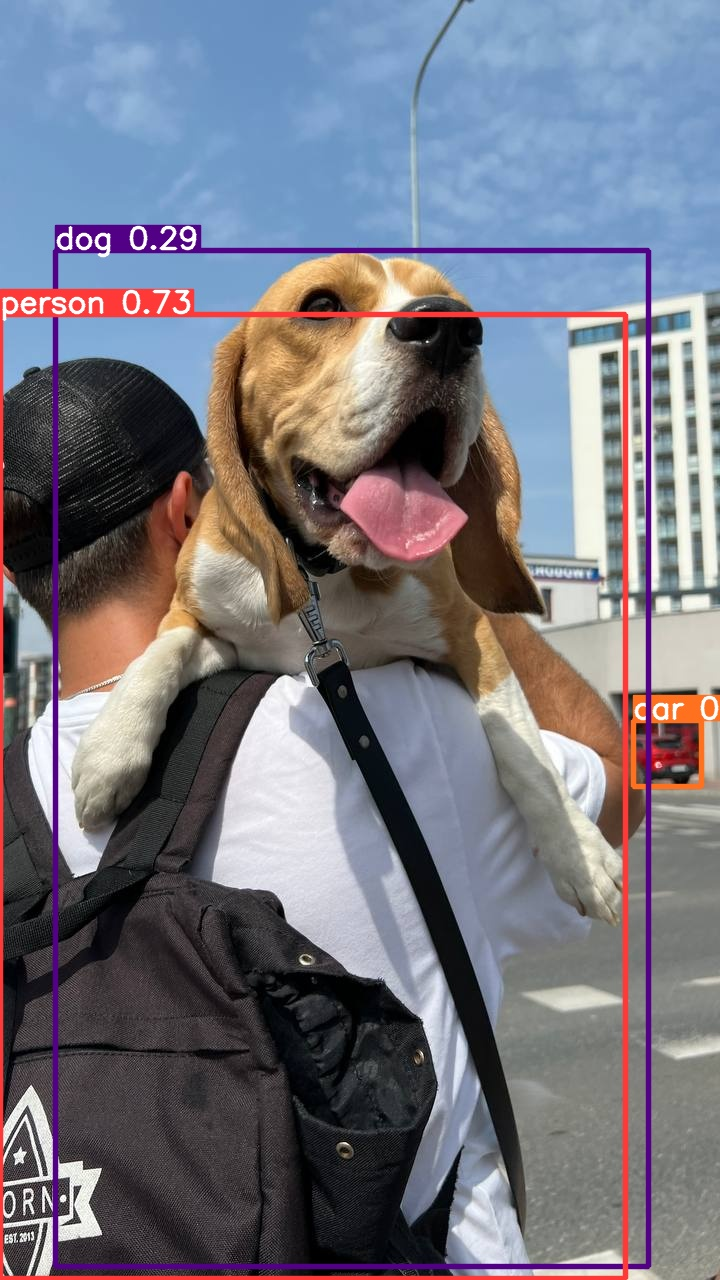

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [47]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="0i8v0fEn4mty6Zt83ACV")
project = rf.workspace("myworkspace-bkrfh").project("analiz-ssev8")
version = project.version(2)
dataset = version.download("yolov8")

[WinError 2] Sistem belirtilen dosyayı bulamıyor: 'C:\\Users\\ekrem\\Desktop\\intership_project(Mekansal Birey Kalma Süresi Analizi)/datasets'
C:\Users\ekrem\Desktop\intership_project(Mekansal Birey Kalma Süresi Analizi)


The syntax of the command is incorrect.


loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 242MB/s]
New https://pypi.org/project/ultralytics/8.2.76 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/analiz-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=

Bu kod parçacığı, nesne algılama görevi için özel bir veri kümesi üzerinde bir YOLOv8 modelini eğitmek için kullanılır. Eğitim, 800x800 piksele yeniden boyutlandırılmış görüntüler üzerinde 25 epok boyunca çalışacaktır. Komut, modelin nasıl öğrendiğini görselleştirmeye yardımcı olmak için eğitim sırasında otomatik olarak grafikler oluşturacak şekilde ayarlanmıştır.

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch30.jpg
confusion_matrix.png				    R_curve.png       train_batch31.jpg
events.out.tfevents.1723557412.435eeafc9383.1496.0  results.csv       train_batch32.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


**args.yaml**: Genellikle eğitim sürecinde kullanılan model yapılandırması, öğrenme oranı, yığın boyutu vb. gibi argümanları veya hiperparametreleri depolayan bir YAML dosyası.

**confusion_matrix_normalized.png ve confusion_matrix.png**: Bunlar eğitim sırasında oluşturulan karışıklık matrislerini temsil eden görüntülerdir (PNG formatında).

**Confusion Matrix:(Karışıklık Matrisi)**: Gerçek ve tahmin edilen sınıflandırmaları göstererek bir sınıflandırma algoritmasının performansını değerlendirmek için kullanılan bir tablo.

**Normalized:** Normalleştirilmiş karışıklık matrisi, ham sayılar yerine tahminlerin oranlarını gösterir.

**events.out.tfevents:** Bu, eğitim sırasında ölçümleri görselleştirmek için bir araç olan TensorBoard tarafından oluşturulan bir dosyadır. Dosya skaler değerler, histogramlar, görüntüler ve daha fazlası gibi olay verilerini içerir.


**F1_curve.png:** Eğitim sırasında F1 skoru eğrisini temsil eden bir görüntü.  

**F1 Score(F1 Puanı)**: Kesinlik ve geri çağırmayı dengeleyen, özellikle dengesiz veri kümelerinde yararlı olan bir metrik.

**labels_correlogram.jpg and labels.jpg:** 

**Labels Correlagram:**(Etiketler Korelagramı): Farklı etiketler veya sınıflar arasındaki korelasyonu gösteren görsel bir temsil.

**Labels.jpg:** Büyük olasılıkla veri kümesinde bulunan etiketlerin görselleştirilmesi.

**P_curve.png, PR_curve.png, R_curve.png:**

**P_curve.png** Eğitim sırasında hassasiyet eğrisi.

**PR_curve.png:** Precision-Recall curve(Hassasiyet-Geri Çağırma eğrisi), farklı eşikler için hassasiyet ve geri çağırma arasındaki değiş tokuşu gösteren grafiksel bir gösterimdir.

**R_curve.png:** Eğitim sırasında hatırlama eğrisi.

**results.csv and results.png:** 

**results.csv:** Doğruluk, kesinlik, geri çağırma gibi metrikler de dahil olmak üzere eğitim sürecinin ayrıntılı sonuçlarını içeren bir CSV dosyası.

**results.png:** Eğitim sonuçlarının görsel bir temsili (muhtemelen bir özet).

**train_batch0.jpg, train_batch1.jpg, train_batch2.jpg, etc.:**

Bunlar eğitim gruplarından görüntülerdir. Muhtemelen modelin eğitim sırasında bu görüntülerdeki nesneleri nasıl tahmin ettiğine dair örnekler gösterirler.

**val_batch0_labels.jpg and val_batch0_pred.jpg:**

**val_batch0_labels.jpg:** Bir doğrulama grubu için temel gerçek etiketlerini gösteren bir görüntü.

**val_batch0_pred.jpg:** Aynı doğrulama grubu için modelin tahminlerini gösteren bir görüntü.

**weights:** Bu muhtemelen eğitilmiş model ağırlıklarını içeren bir dizindir. Bunlar, eğitimden sonra modelin öğrenilen parametrelerini saklayan dosyalardır.

**Özet:**  Bu dizin, performans ölçümleri (eğriler, karışıklık matrisleri), eğitim sürecinin görselleştirmeleri ve TensorBoard tarafından oluşturulan bazı dosyalar dahil olmak üzere bir YOLO modelinin eğitiminden elde edilen çeşitli çıktıları içerir. Dizindeki görüntüler modelin ne kadar iyi performans gösterdiğini görselleştirmeye yardımcı olurken, args.yaml ve results.csv dosyaları ayrıntılı yapılandırma ve sonuç verileri sağlar.


/content


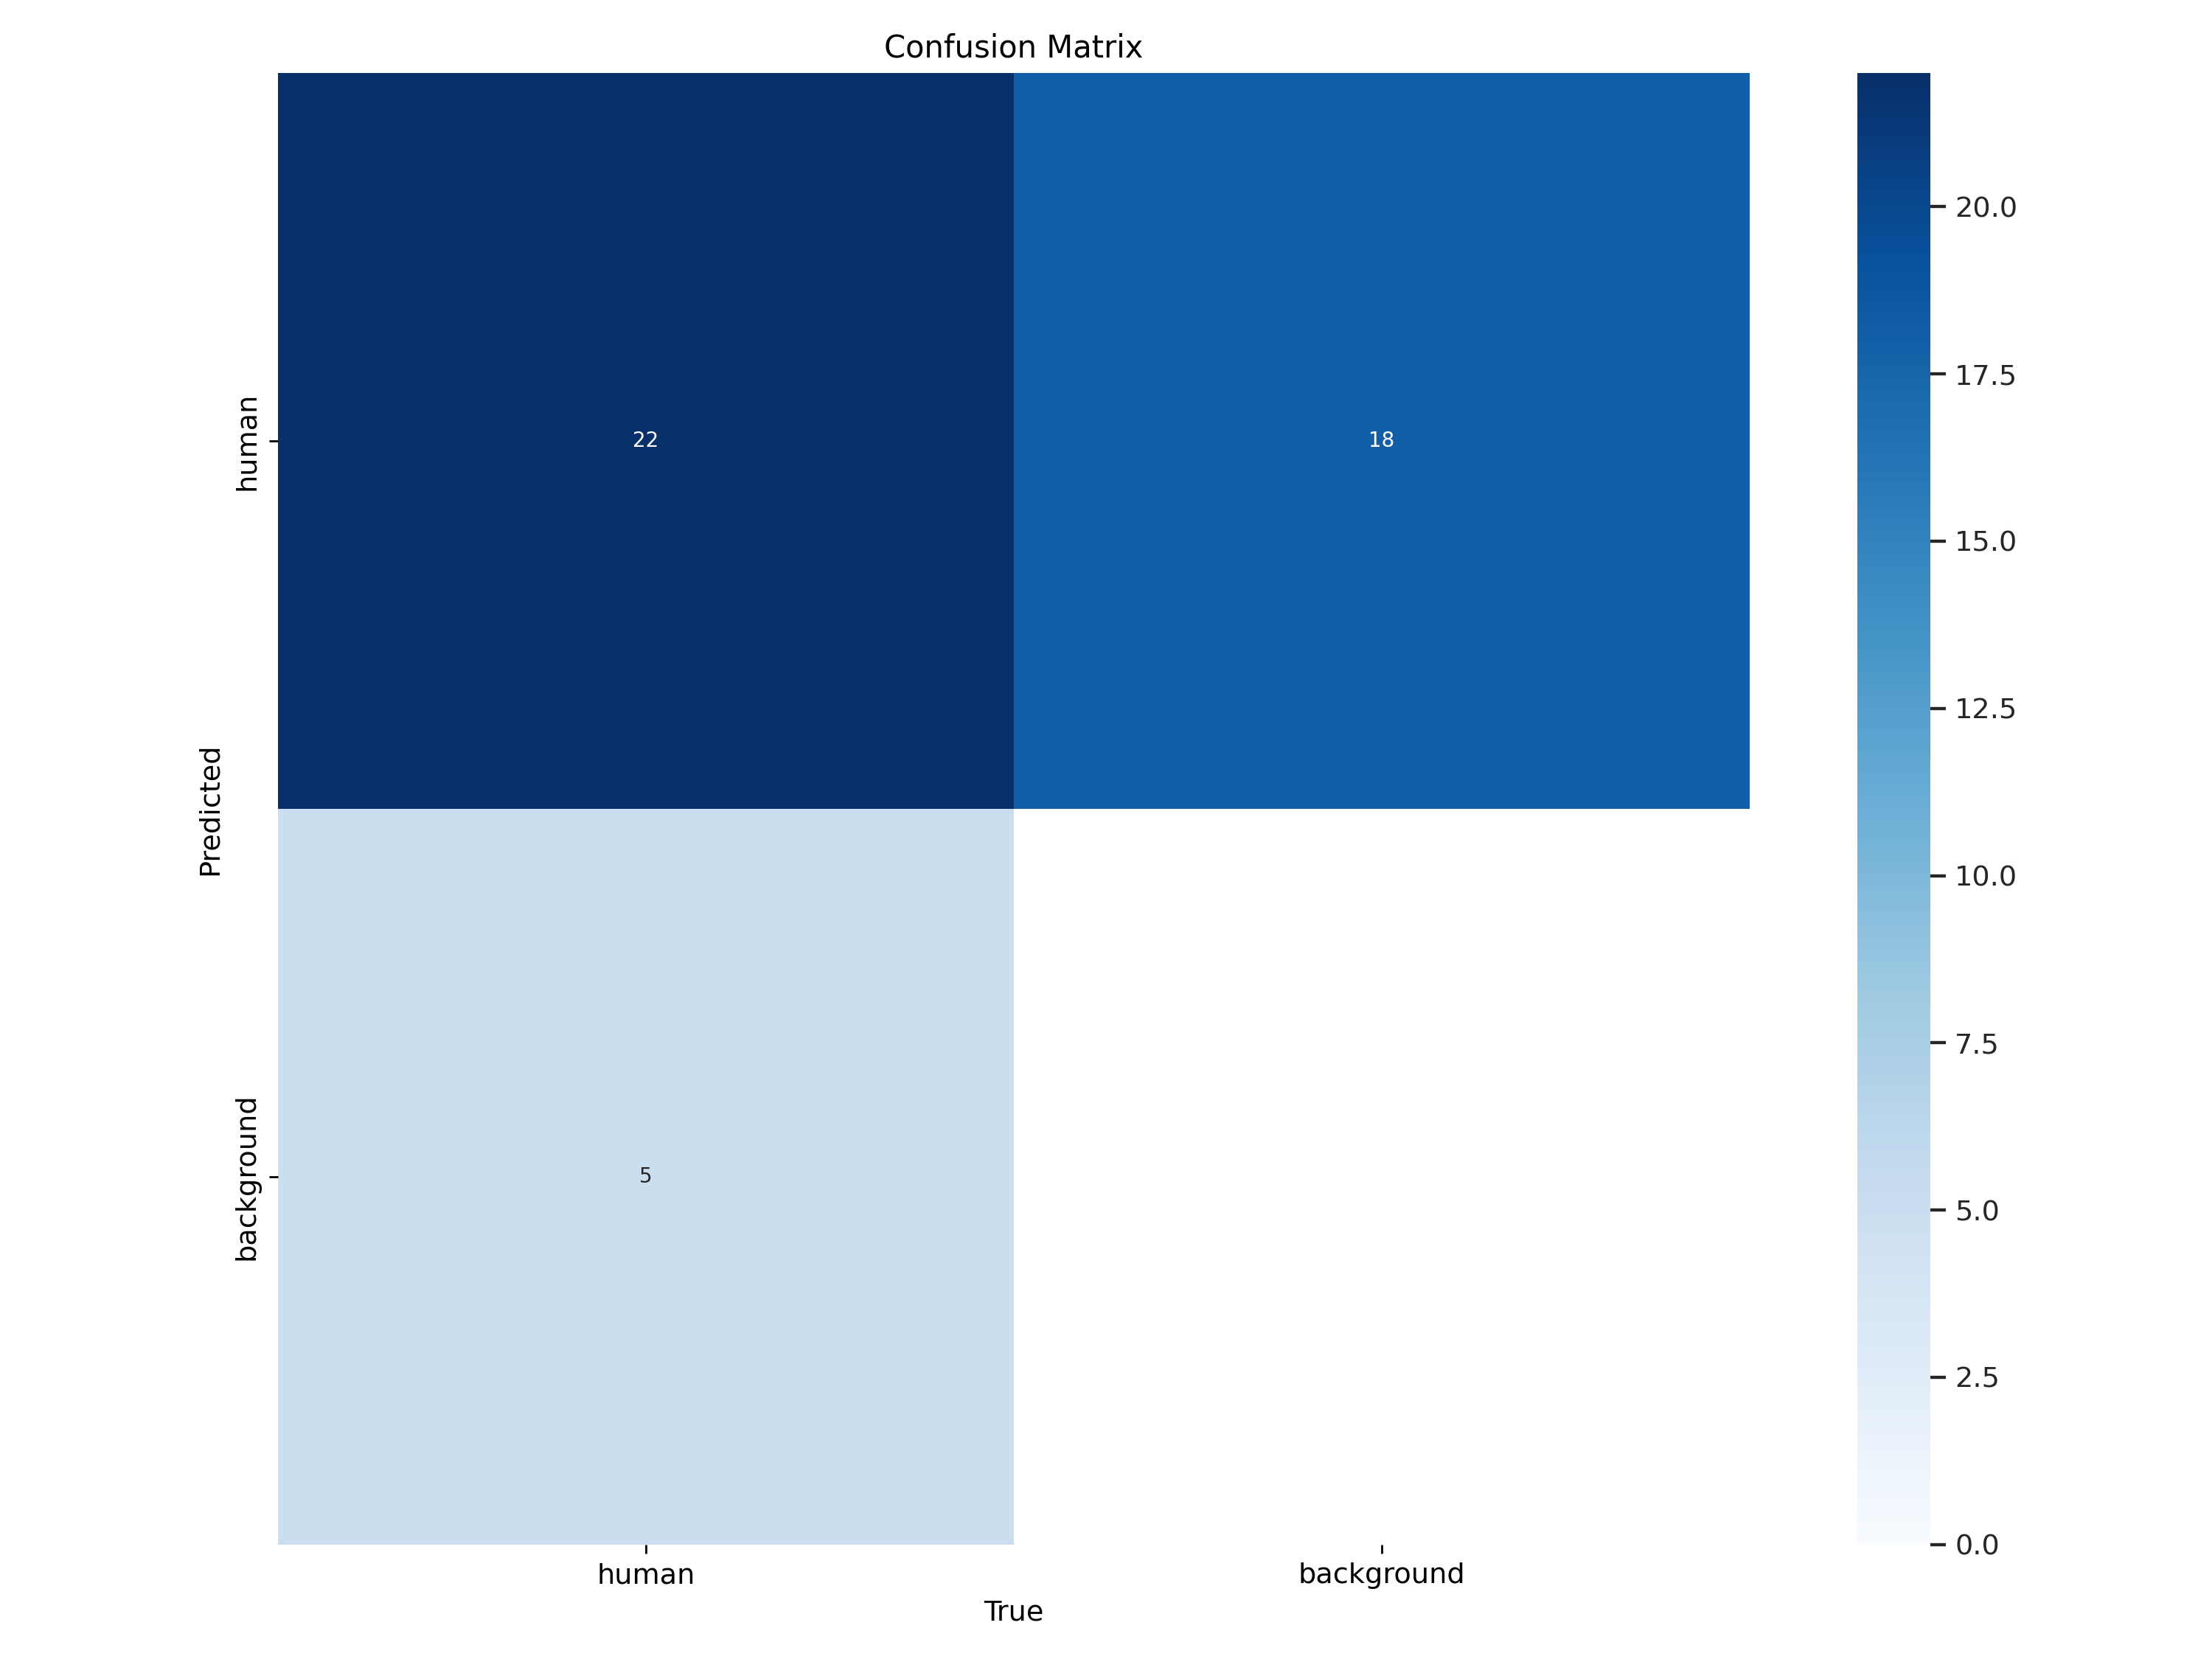

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

**Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600):**

Bu satır, Jupyter Notebook'ta bir görüntü görüntülemek için IPython.display'deki Image işlevini kullanır.

**filename=f'{HOME}/runs/detect/train/confusion_matrix.png': **

Eğitim sırasında oluşturulan karışıklık matrisi görüntüsüne giden yolu belirtir.

**width=600** : Görüntülenen görüntünün genişliğini 600 piksel olarak ayarlar, bu da görüntünün not defterinde görüntülenmek üzere uygun şekilde ölçeklendirilmesini sağlar.


**Confusion Matrix Interpretation:**(Karışıklık Matrisi Yorumu:)
Karışıklık matrisi, tipik olarak ikili sınıflandırma problemlerinde bir modelin performansını özetlemek için kullanılan 2x2'lik bir tablodur.

**Axes:**
**horizontal axis (True)** 
Yatay eksen (Gerçek) gerçek etiketleri (zemin gerçeği) temsil eder.

**vertical axis (Predicted)**
Dikey eksen (Tahmin Edilen) model tarafından tahmin edilen etiketleri temsil eder.

Etiketlerin "insan" ve "arka plan" olması, modelin nesneleri insan ya da insan olmayan (arka plan) olarak sınıflandırdığını göstermektedir.


**Matrix Values:**

**Top-left (22):** Sol üst (22): Modelin "insan "ı "insan" olarak doğru tahmin ettiği doğru pozitiflerin (TP) sayısını temsil eder.

**Top-right (18):** Modelin "insan "ı "arka plan" olarak yanlış tahmin ettiği yanlış negatiflerin (FN) sayısını temsil eder.

**Bottom-left (5):** Sol alt (5): Modelin "arka plan "ı "insan" olarak yanlış tahmin ettiği yanlış pozitiflerin (FP) sayısını temsil eder.

**Bottom-right (empty):** Modelin "arka plan "ı "arka plan" olarak doğru tahmin ettiği gerçek negatifleri (TN) temsil eder. Ancak, bu matriste hiçbir gerçek negatif görünmemektedir, bu da tüm gerçek arka planların arka plan olarak doğru şekilde tahmin edildiğini veya değerlendirmede bulunmadıklarını gösterir.

**Özet:**

**Accuracy Insight** :(Doğruluk İçgörüsü:)
Karışıklık matrisi, modelin 27 kişiden 22'sini doğru tanımladığını göstermektedir (22 TP + 5 FP), bu da makul bir performansa işaret etmekle birlikte iyileştirme için bir miktar alan olduğunu göstermektedir.

Model 18 "insan" örneğini "arka plan" olarak yanlış sınıflandırmıştır, bu da belirli durumlarda insanları ayırt etmekte zorlanabileceğini göstermektedir.


**Further Analysis** (Daha Fazla Analiz)

Modeli geliştirmek istiyorsanız, epok sayısını artırmayı, öğrenme oranını ayarlamayı veya modelin insanlar ile arka plan öğelerini daha iyi ayırt etmesine yardımcı olmak için daha çeşitli eğitim verileri sağlamayı düşünün.

/content


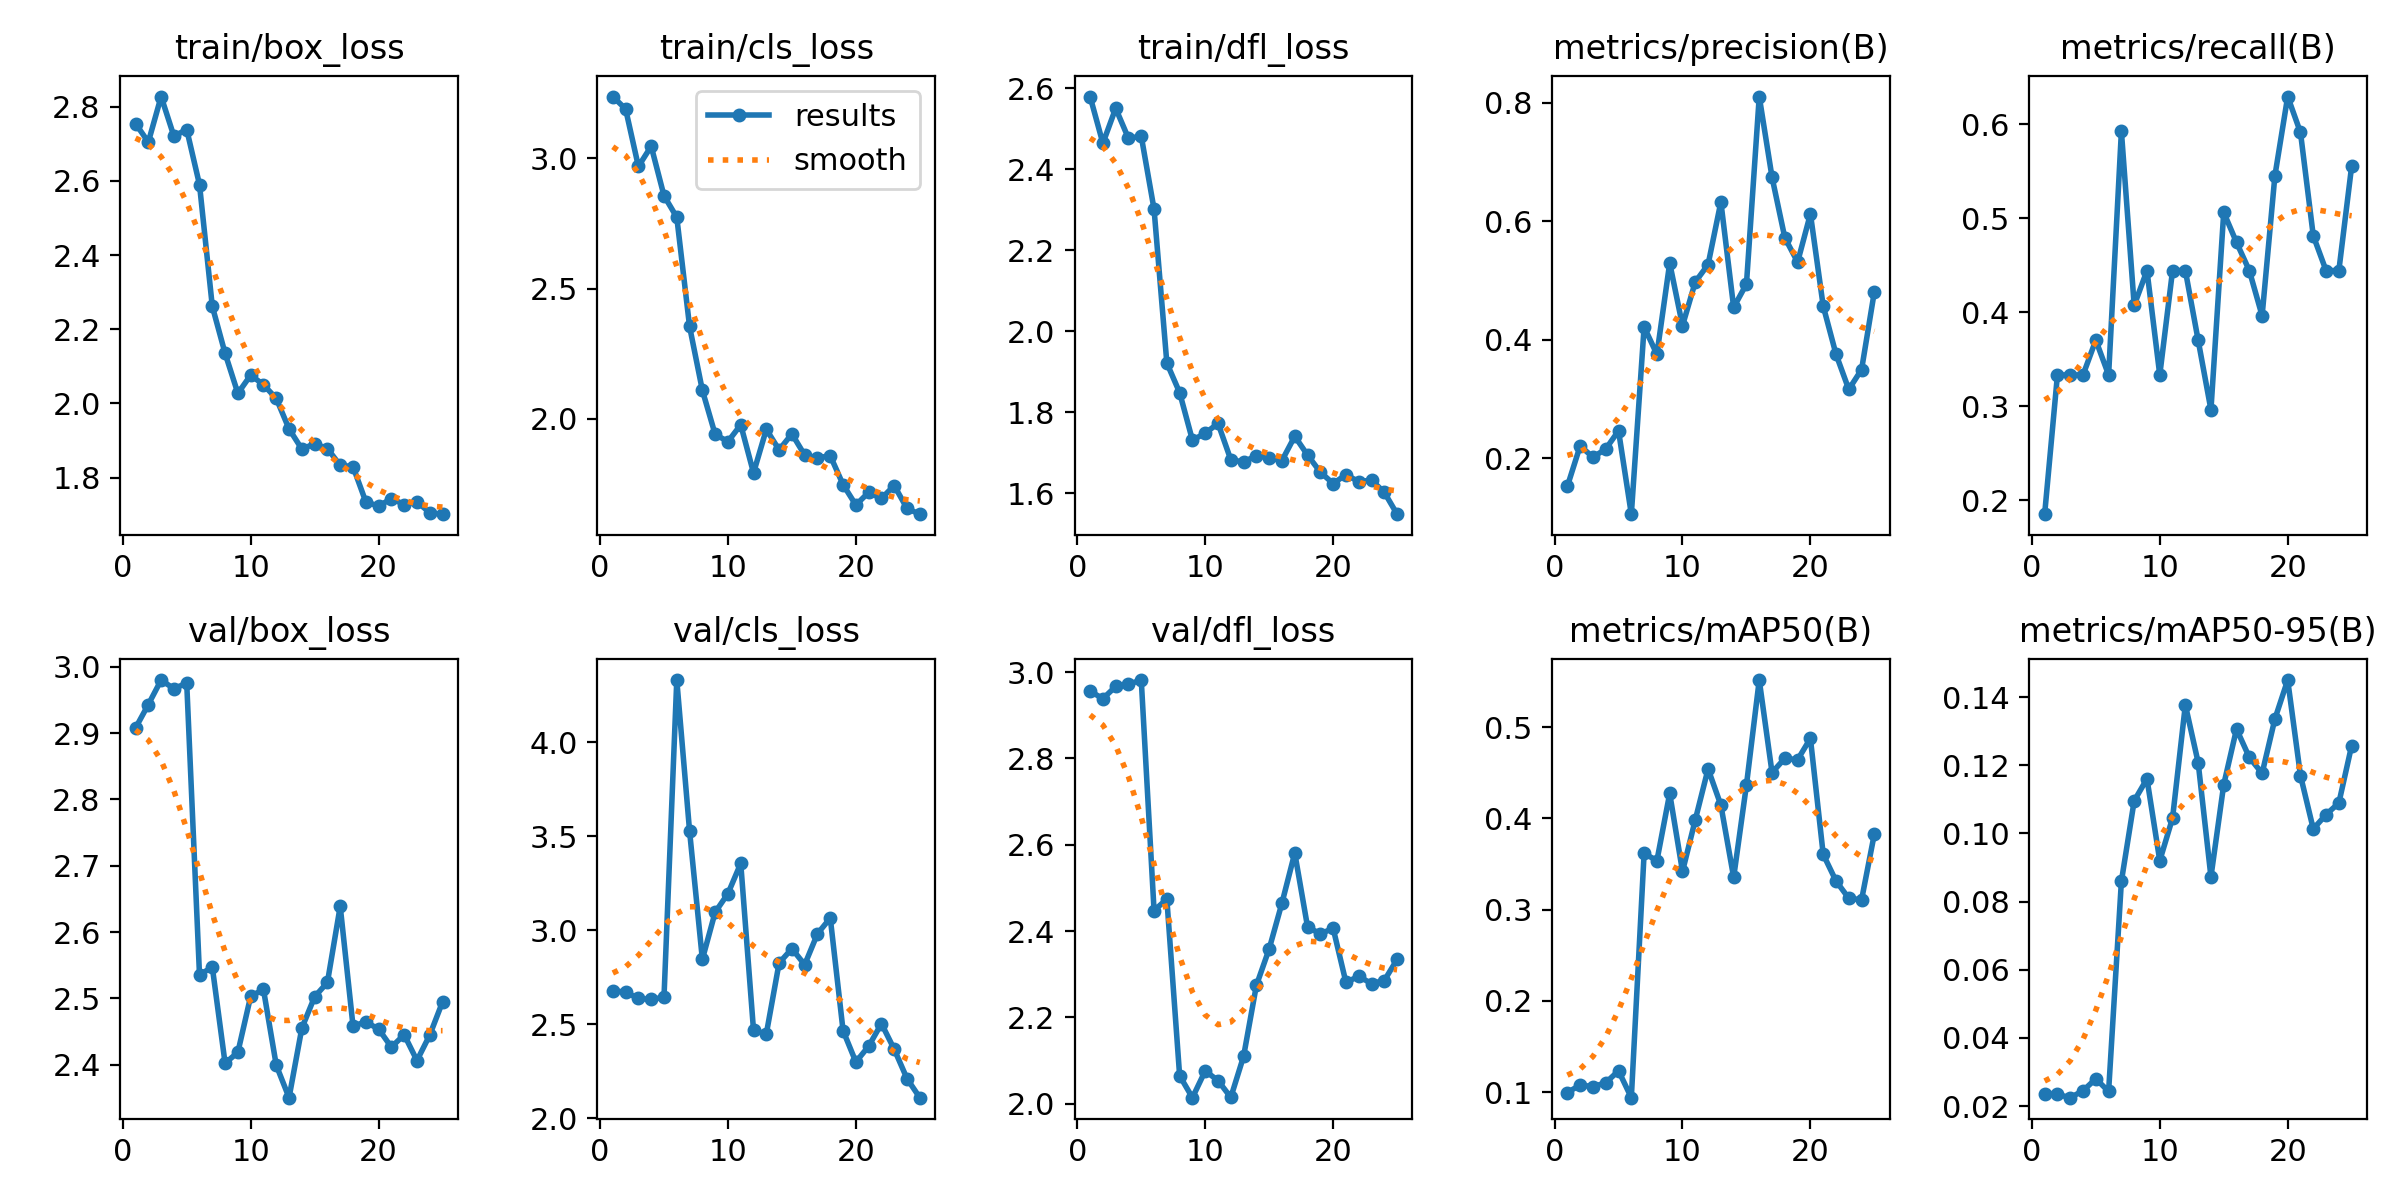

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

Görüntü, bir Jupyter Notebook'ta gösterildiği gibi 25 epok boyunca çizilen bir dizi eğitim ve doğrulama ölçümünü göstermektedir. Bu görüntüyü oluşturan kod öncekilere benzer, ancak farklı bir görselleştirme kümesi gösterir.

**Plot Descriptions:**

**1-train/box_loss:**

**Box Loss (Training):** Bu, tahmin edilen sınırlayıcı kutuların temel gerçek kutularıyla ne kadar iyi eşleştiğini ölçer. Daha düşük bir kayıp, sınırlayıcı kutuları tahmin etmede daha iyi doğruluk olduğunu gösterir.

**2-train/cls_loss:** 

**Classification Loss (Training):** (Sınıflandırma Kaybı (Eğitim)): Bu, modelin nesneleri doğru kategorilere ne kadar iyi sınıflandırdığını ölçer. Daha düşük bir kayıp, daha iyi sınıflandırma doğruluğunu gösterir.

**3-train/dfl_loss:**

**Distribution Focal Loss (Training):** Bu, tahmin edilen sınırlayıcı kutuları zemin gerçeğiyle daha doğru bir şekilde hizalamaya odaklanan nesne algılama modellerinde kullanılan özel bir kayıptır.

**4-metrics/precision(B):** 

**Precision Metric:**(Hassasiyet Metriği): Hassasiyet, tüm pozitif tahminler içinde doğru pozitif tespitlerin yüzdesini ölçer. Daha yüksek hassasiyet, daha az yanlış pozitif olduğunu gösterir.

**5-metrics/recall(B):** 

**Recall Metric:**  (Geri Çağırma Metriği:) Geri çağırma, veri kümesindeki tüm gerçek pozitiflerin içindeki gerçek pozitiflerin yüzdesini ölçer. Daha yüksek geri çağırma, daha az yanlış negatif olduğunu gösterir.

**6-val/box_loss:** 

**Box Loss (Validation):** (Kutu Kaybı (Doğrulama)): Eğitim kutusu kaybına benzer, ancak bu doğrulama kümesi üzerinde ölçülür. Modelin görülmeyen verilere iyi genelleme yapıp yapmadığını belirlemeye yardımcı olur.

**7-val/cls_loss:** 

**Classification Loss (Validation):** Sınıflandırma Kaybı (Doğrulama): Bu, modelin yeni verilere ne kadar iyi genelleme yaptığını gösteren doğrulama setindeki sınıflandırma doğruluğunu ölçer.

**8-val/dfl_loss:** 

**Distribution Focal Loss (Validation):** (Dağıtım Odak Kaybı (Doğrulama)|) : Bu, modelin doğrulama kümesindeki sınırlayıcı kutuları ne kadar iyi tahmin ettiğini ölçer.

**9-metrics/mAP50(B):**  

**Mean Average Precision at IoU=0.50 (B):**  Bu, nesne algılamada kesinlik ve geri çağırmayı birleştiren yaygın bir metriktir. IoU=0,50 değeri daha yumuşaktır ve tahmin edilen kutu zemin gerçeğiyle %50 veya daha fazla örtüşüyorsa bir algılamayı doğru kabul eder.  

**10-metrics/mAP50-95(B)**  

**Mean Average Precision at IoU=0.50-0.95 (B):** IoU=0,50-0,95'te Ortalama Ortalama Hassasiyet (B): Bu metrik, 0,50 ila 0,95 arasındaki bir dizi IoU eşiğini dikkate alarak daha katıdır. Modelin farklı kutu örtüşme doğruluğu seviyelerindeki performansının daha kapsamlı bir görünümünü verir.

**Summary **

**Training Losses** Eğitim Kayıpları: Eğitim için kayıp eğrileri (box_loss, cls_loss, dfl_loss) genellikle azalmaktadır, bu da modelin eğitim sürecinde öğrendiğini ve tahminlerini geliştirdiğini göstermektedir.

**Validation Losses:**(Doğrulama Kayıpları): Doğrulama kaybı eğrileri, modelin görülmeyen verilere ne kadar iyi genelleme yaptığına dair fikir verir. İdeal olarak, bunlar eğitim kayıplarıyla benzer bir düşüş eğilimi izlemelidir, ancak herhangi bir sapma (örneğin, artan doğrulama kaybı) aşırı uyuma işaret edebilir.

**Precision and Recall:** (Kesinlik ve Geri Çağırma): Bu metrikler, eğitim sırasında tipik olan bazı değişkenlikler gösterir. Modelin nesneleri doğru tespit etme becerisini geliştirdiğini gösteren genel bir artış eğilimi arzu edilir.

**mAP Metrics:** mAP Metrikleri: mAP metrikleri, modelin çeşitli kesişme noktası eşiklerinde (IoU) gösterdiği performansın bir özetini sunar. Bunlar ideal olarak zaman içinde artmalı ve daha iyi tespit doğruluğu göstermelidir.

Sağlanan grafikler, modelin eğitim ve doğrulama sırasında ne kadar iyi performans gösterdiğine dair kapsamlı bir genel bakış sunar. Azalan kayıplar ve artan hassasiyet/hatırlama gibi genel eğilimler, etkili bir şekilde öğrenen bir modelin işaretleridir.

/content


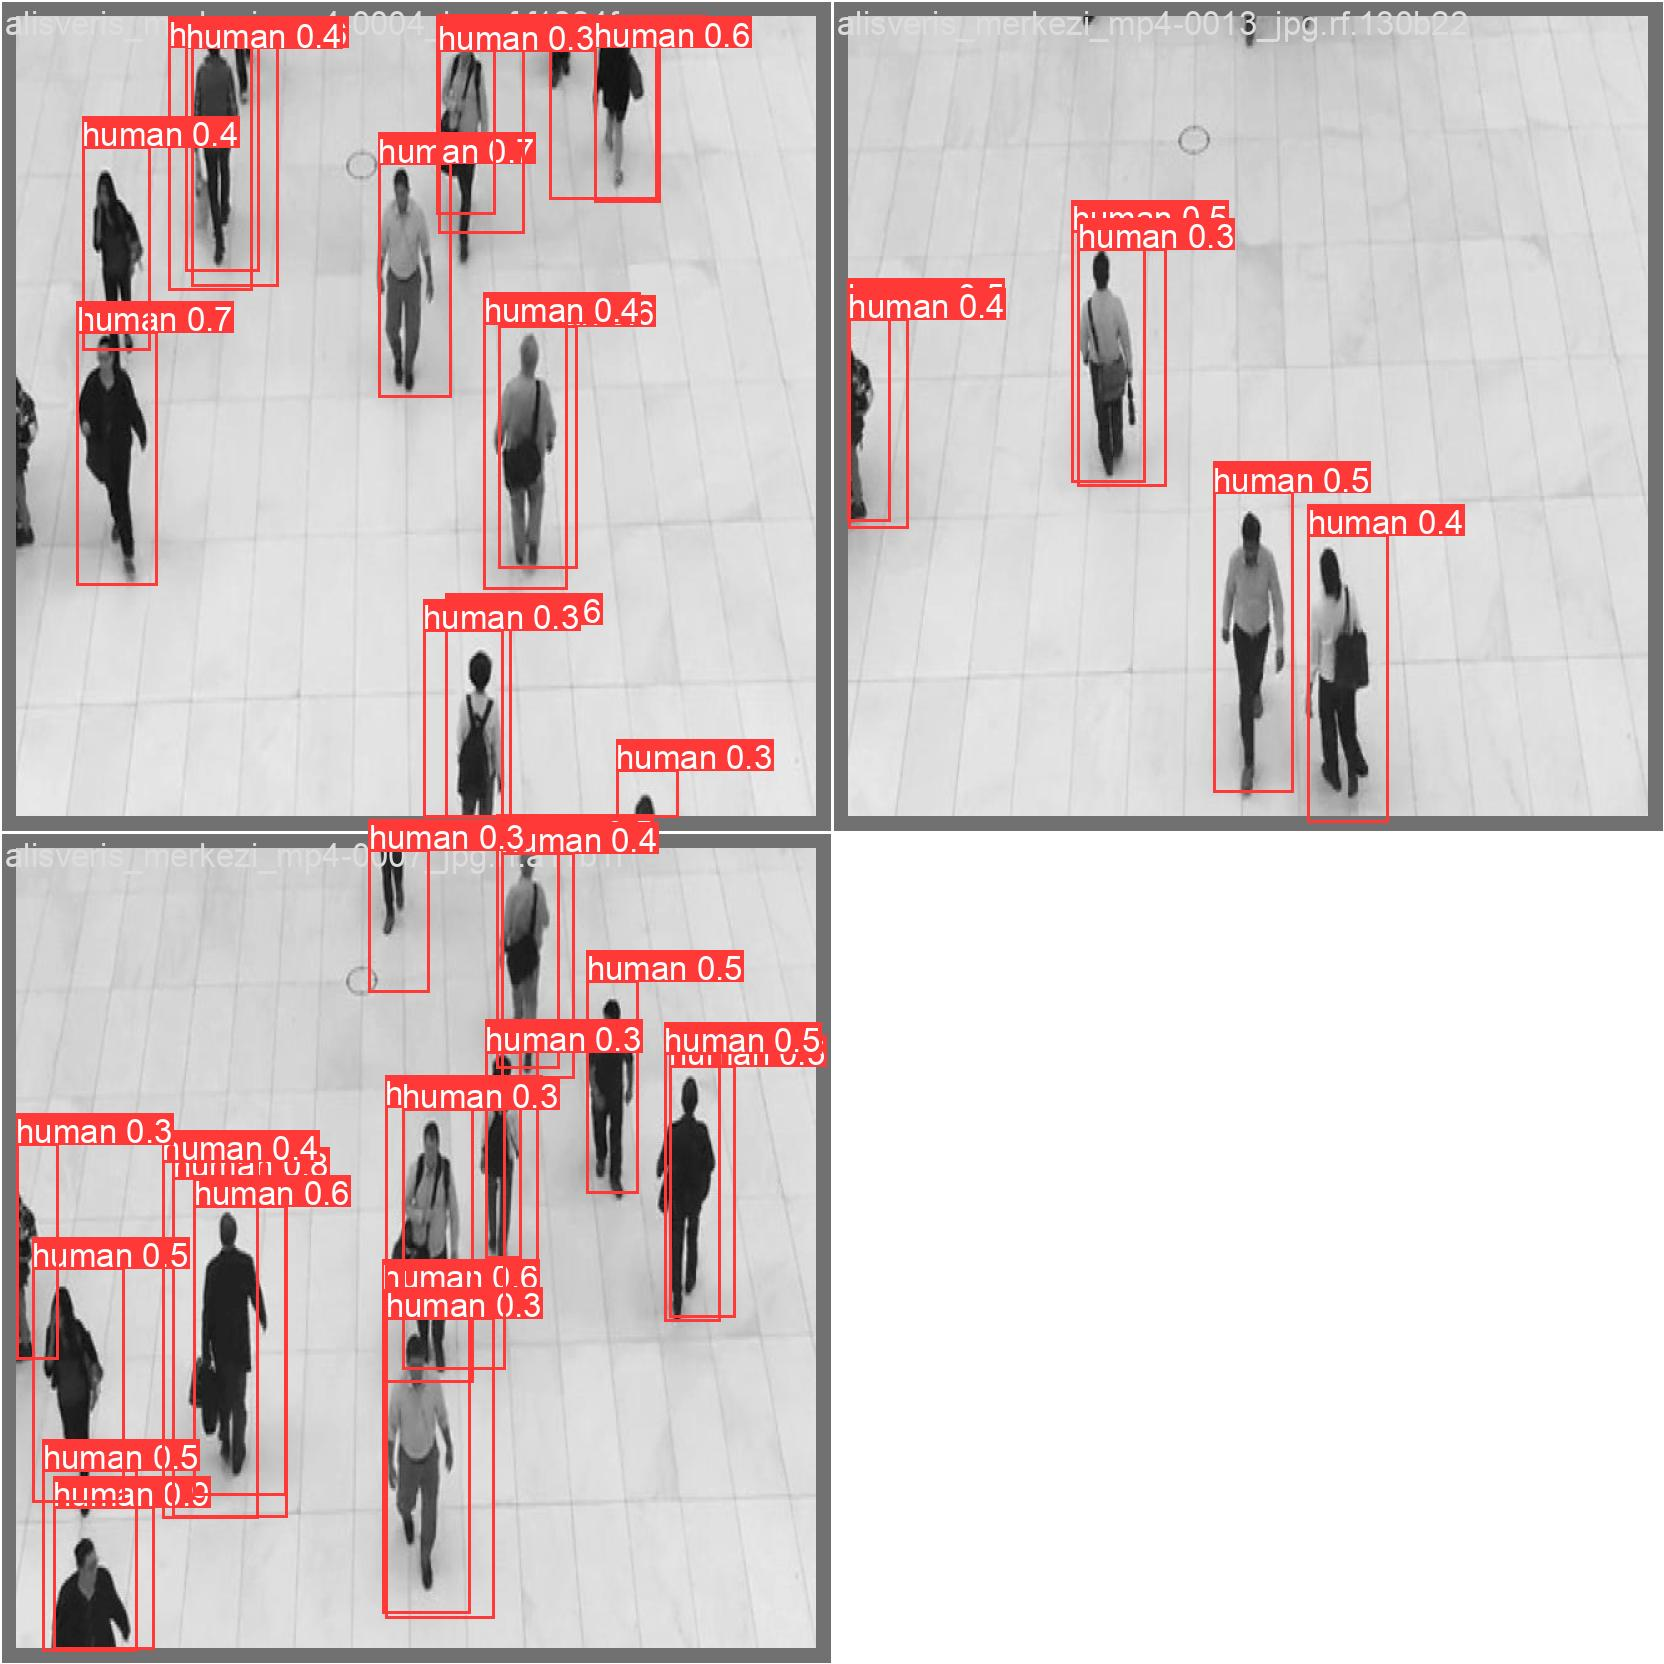

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## **Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600):** 
Bu satır, belirtilen dizindeki val_batch0_pred.jpg görüntüsünü 600 piksel genişliğinde görüntüler.

## **Image Analysis:**

Görüntü, modelin doğrulama grubundaki çeşitli karelerde (veya segmentlerde) insanları tespit etmeye yönelik tahminlerini göstermektedir. Tahminler, tespit edilen her bir kişinin yanında "insan" etiketi ve bir güven puanı (0 ile 1 arasında değişen) bulunan kırmızı sınırlayıcı kutularla temsil edilmektedir.

## **Bounding Boxes:** (Sınırlayıcı Kutular:)
Tespit edilen nesnelerin etrafındaki kırmızı dikdörtgenler, modelin "insan" nesnelerini tanımladığı alanları göstermektedir. Bu kutular model tarafından yapılan tahminlerdir.

## **Confidence Scores:**(Güven Puanları:)

Human ("İnsan") etiketlerinin yanındaki sayılar (örn. 0,4, 0,6, 0,7) modelin tahminlerinin güven seviyelerini temsil etmektedir. Daha yüksek bir puan, modelin tespit edilen nesnenin gerçekten bir insan olduğundan daha emin olduğunu gösterir.

## **Interpretation:**(Yorum) 

**Model Performance:** 

Model, sınırlayıcı kutular ve ilgili güven puanları ile gösterildiği gibi, karelerde birden fazla insanı başarıyla tespit etmiştir. 

Bazı güven puanları nispeten düşüktür (örn. 0,3, 0,4), bu da modelin bazı tespitlerinden emin olmadığını gösterebilir. Bunun nedeni oklüzyon, düşük görüntü kalitesi veya zorlu açılar gibi faktörler olabilir.

**Possible Improvements:**(Olasi Iyilestirmeler)

**Increase Confidence Threshold:** Güven Eşiğini Artırın:  Yanlış pozitifleri azaltmak için belirli bir güven seviyesinin altındaki tahminleri filtrelemeyi düşünebilirsiniz.

**Further Training:**:  Daha Fazla Eğitim: Birçok tahmin düşük güven gösteriyorsa, daha çeşitli verilerle ek eğitim, modelin doğruluğunu ve güvenini artırmaya yardımcı olabilir.

**Adjust Model Parameters** Model Parametrelerini Ayarlayın: Öğrenme oranı veya yığın boyutu gibi hiperparametrelerin ayarlanması da tespit doğruluğunu artırabilir.

**Özet** : Sağlanan görüntü, modelin genel olarak doğrulama görüntülerindeki insanları tespit edebildiğini, ancak farklı güven derecelerine sahip olduğunu göstermektedir. Bu çıktı, modelin görünmeyen veriler üzerindeki performansını değerlendirmek ve modelin daha fazla iyileştirmeye ihtiyaç duyabileceği alanları belirlemek için kullanışlıdır.

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/analiz-2/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100% 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.25it/s]
                   all          3         27       0.63       0.63      0.488      0.145
Speed: 0.4ms preprocess, 29.5ms inference, 0.0ms loss, 201.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml:**

**!yolo**: YOLO komut satırı arayüzünü çağırır.

**task=detect**: Görevin nesne algılama olduğunu belirtir.

**mode=val**: Modun doğrulama olduğunu, yani modelin bir doğrulama veri kümesi üzerinde değerlendirileceğini belirtir.

**model={HOME}/runs/detect/train/weights/best.pt:** Eğitim süreci sırasında kaydedilen eğitilmiş modelin ağırlıklar dosyasının (best.pt) yolunu belirtir. Bu model doğrulama için kullanılacaktır.

**data={dataset.location}/data.yaml**  Doğrulama veri kümesi hakkında bilgi içeren veri yapılandırma dosyasının (data.yaml) yolunu belirtir.

**Output Analysis:**(Cikti Analizi)

**Ultralytics YOLOv8.0.196:** Kullanılan YOLOv8 sürümü.

**Environment Details:** 

**Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB):** Bu satır Python ortamı, PyTorch sürümü ve doğrulama için kullanılan CUDA özellikli GPU (Tesla T4) hakkında ayrıntılar sağlar.

**Model Summary:(Model Ozeti)168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs:** 

168 katman, 11125971 parametreler, 0 gradyan, 28,4 GFLOPs: Bu, katman sayısı, toplam parametreler ve GFLOP (Giga Kayan Nokta İşlemleri) cinsinden hesaplama karmaşıklığı dahil olmak üzere YOLOv8 modelinin mimarisini özetlemektedir.


**Validation Process:**(Dogrulama Sureci) :

**Scanning /content/datasets/analiz-2/valid/labels.cache** Model, belirtilen yolda bulunan doğrulama veri kümesini tarıyor.

**Images: 3, Instances: 27:**  Görüntüler: 3, Örnekler: 27: Doğrulama veri kümesinin 3 görüntü ve algılanacak nesnelerin 27 örneğini içerdiğini gösterir.

**Box(P R):**  Doğrulama sonuçları Hassasiyet (P), Geri Çağırma (R), mAP50 ve mAP50-95 metriklerini içerir:

       **Precision (P) ** Kesinlik (P): 0,63; bu da tespit edilen nesnelerin %63'ünün gerçek pozitif olduğunu göstermektedir.
       
       **Recall (R): ** Hatırlama (R): 0,63, yani model veri kümesindeki gerçek nesnelerin %63'ünü doğru bir şekilde tanımlamıştır.
       
       **mAP50: ** 0.488, 0.50'lik Birlik Üzerinde Kesişme (IoU) eşiğinde ortalama Ortalama Hassasiyeti temsil eder.
       
       **mAP50-95** 0.145, 0.50 ila 0.95 arasında birden fazla IoU eşiği arasında hesaplanan mAP'dir. Bu metrik, modelin performansının daha kapsamlı bir değerlendirmesini verir.
       
       
       **Speed:** 
       
       **0.4ms preprocess, 29.5ms inference, 0.0ms loss, 201.6ms postprocess per image: ** Görüntü başına 0,4 ms ön işlem, 29,5 ms çıkarım, 0,0 ms kayıp, 201,6 ms son işlem: Bunlar, ön işleme, çıkarım ve son işleme dahil olmak üzere doğrulama sürecinin her aşaması için zamanlamalardır.
       
       
       **Results:** 
       
       **Results saved to runs/detect/val** Results saved to runs/detect/val: Metrikler ve görselleştirmeler de dahil olmak üzere doğrulama sonuçları daha sonra incelenmek üzere belirtilen dizine kaydedilir.
       
       **Documentation:** YOLO'daki doğrulama modları hakkında daha fazla bilgi edinmek için bir bağlantı verilmiştir: https://docs.ultralytics.com/modes/val.
       
## Özet:

Bu dizüstü bilgisayar hücresi, küçük bir doğrulama veri kümesi (27 örnekli 3 görüntü) kullanarak bir YOLOv8 modelini doğrulamaktadır. Modelin performansı hassasiyet, geri çağırma ve mAP değerleri gibi temel metriklerle özetlenmiştir.

Sonuçlar, mAP değerlerinin gösterdiği gibi orta düzeyde performans ile dengeli bir hassasiyet ve geri çağırma göstermektedir. Bu metrikler, modelin görülmeyen verilere ne kadar iyi genelleme yaptığını değerlendirmek için kullanılabilir.

Süreç ayrıca, modelin gerçek zamanlı uygulamalardaki verimliliğini değerlendirirken önemli olabilecek hız ölçümlerini de kaydeder.


       


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/datasets/analiz-2/test/images/alisveris_merkezi_mp4-0001_jpg.rf.f733bef0ed5cb9502b8669fe78519a1b.jpg: 800x800 14 humans, 23.0ms
Speed: 10.3ms preprocess, 23.0ms inference, 592.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


**OZET:** 

Bu dizüstü bilgisayar hücresi, bir test görüntüsü üzerinde özel bir YOLOv8 modeli kullanarak çıkarım yapmaktadır. Model görüntüdeki 14 insanı başarıyla tespit etti ve süreç bazı ön işleme, çıkarım ve son işleme adımlarını içeriyordu. Tespit edilen nesneler ve ilgili sınırlayıcı kutular da dahil olmak üzere sonuçlar daha fazla inceleme için kaydedilmiştir.

**NOTE:** Let's take a look at few results.

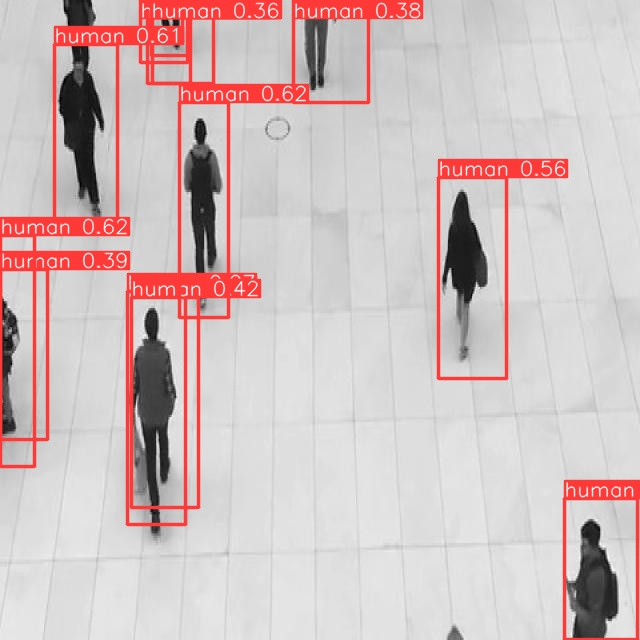

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

Sağlanan  görüntü, belirli bir dizindeki görüntüleri görüntülemek için Python kodunun kullanıldığı ve muhtemelen bir nesne algılama modelinin sonuçlarını gösteren bir Jupyter Notebook hücresini göstermektedir. Kodun altında, tespit edilen nesnelerin (insanlar) sınırlayıcı kutular ve güven puanları ile açıklandığı bir görüntü var.


**1-import glob and from IPython.display import Image, display:** 

**glob** Belirli bir desenle eşleşen dosyaları aramanıza olanak tanıyan dosya deseni eşleştirmesi için kullanılır.

**Image, display** Bunlar, görüntüleri doğrudan Jupyter Notebook içinde görüntülemek için kullanılır.


**2-Base Path Definition:** 

**base_path = '/content/runs/detect/'** Modelin çıktı klasörlerinin bulunduğu dizini tanımlar.

**3-List Directories:** 

**subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]:**
Bu satır, temel yolda "predict" adıyla başlayan alt klasörlerin bir listesini oluşturur.

**4-Find the Latest Folder:** 

**latest_folder = max(subfolders, key=os.path.getmtime)** "Tahmin" klasörleri listesinden en son değiştirilen klasörü bulur.

**5-Image Paths:** 

**image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]:** En son klasördeki ilk üç .jpg görüntüsünün yollarını alır.

**6-Display Images:**

**for image_path in image_paths::**  Görüntü yolları listesi üzerinde yineleme yapar.

**display(Image(filename=image_path, width=600)):**  Not defterindeki her görüntüyü 600 piksel genişliğe ölçeklendirilmiş olarak görüntüler.

**print("\n")**  Daha iyi okunabilirlik için görüntülenen görüntülerin arasına yeni satır ekler.


## Image Analysis:

Kodun altında görüntülenen görüntü, bir sahnede birden fazla insanın tespit edildiği bir nesne algılama modelinden elde edilen çıktıyı göstermektedir.

**Bounding Boxes** Kırmızı dikdörtgenler modelin insanları tespit ettiği alanları vurgulamaktadır.

**Confidence Scores**(Güven Puanları)
"İnsan" etiketlerinin yanındaki sayılar (örneğin, 0,61, 0,36, 0,56) modelin her bir tespit için güven düzeyini temsil eder. Daha yüksek bir puan, modelin tespit edilen nesnenin gerçekten bir insan olduğundan daha emin olduğu anlamına gelir.

**Özet: Bu kod parçacığı, en son nesne algılama sonuçlarını bulma ve görüntüleme işlemini otomatikleştirir. Görüntülenen görüntü, modelin karedeki birden fazla insanı değişen güven düzeyleriyle başarıyla tespit ettiğini doğrular.**


## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [48]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ekrem\\Desktop\\intership_project(Mekansal Birey Kalma Süresi Analizi)/runs/detect/train/weights/best.pt'

In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.